Project: **Data Visualization and Analysis, Machine Learning Programming Project 3** 
<br>
Team Members: **Debit Paudel, Kushal Dahal**
<br>
Github Link: https://github.com/debit7/ML_ID3_Tree?fbclid=IwAR0Yc5W4XYJMTMZT9XSqI53pGClOtvE_vVClQIy5apIuiIBZSNhHm9wr0so

Having four different datasets to work in this project, our first priority was to write code in a dynamic approach so the same code can be implemented to get valid output for each kind of datasets. Though it was difficult to solve the problem at once we followed the steps one by one getting result for each steps.
We worked to classify their labels for each data set so that we can predict the new instances on the basis of the decision tree. Initially we read the data of the csv file and preprocessed them to make the data structured and usable to work on them. 

While reading the dataset, we felt that we need to separate the contents of the file by paragraphs. For the first paragraph, we retrieved the title of the project. Second paragraph are retrieved as the headers for the final structured data. Third paragraph is taken an as the targets we have to classify. Ans for the fourth paragraph, we took them as an data. To conduct these above steps, we build Get_Attributes to build headers. Get_Data function will retrieve the data from the file and build a structured data. Get_Target function lists the possible targets/classifiers available in the data. Get_Attribute_classes function returns the list of every labels of the attributes 

In [43]:
import pandas as pd
import math
with open("treatment.data", "r") as input:
    whole_data = input.read().split("\n\n") 
Heading=whole_data[0].replace('#','')
def Get_Attributes(Adata,Cdata):
    x=Adata.split('\n')
    attributes=[]
    for y in x:
        atts=y.split('#')[1].split(':')[0]
        attributes.append(atts)
    attributes.pop(0)
    c=Cdata.split('\n')
    cattributes=[]
    for y in c:
        atts=y.split('#')[1].split(':')[0]
        cattributes.append(atts)
    cattributes.pop(0)
    attributes.append(cattributes[0])
    return attributes
def Get_Data(Rdata):
    Rdata=Rdata.split('\n')
    Rdata.pop(0)
    lst = []
    for ele in Rdata:
        line = ele.replace(' ','').split(',')
            
        lst.append(line)
    # lst.pop(-1)
    return lst
def Get_Targets(Tdata):
    Tdata=Tdata.split(':')
    targets=Tdata[1].split(',')

    return targets
def Get_Attribute_classes(Cdata):
    Data=Cdata.split('\n')
    Data.pop(0)
    set_data=[]
    for dta in Data:
        new=dta.split(':')
        gg=new[1].split(',')
        set_data.append(gg)
    return set_data


Targets=Get_Targets(whole_data[2])
# print(Targets)
Headers=Get_Attributes(whole_data[1],whole_data[2])
print(Headers)
df = pd.DataFrame(Get_Data(whole_data[3]),columns =Headers) 
df[df.columns] = df.apply(lambda x: x.str.strip())
Atts_labels=Get_Attribute_classes(whole_data[1])
print(Atts_labels)
heads=Get_Attributes(whole_data[1],whole_data[2])
heads.pop(len(heads)-1)
Headers_labels_mapping= {'Attributes':heads,'Labels':Atts_labels}
Headers_labels_mapping=pd.DataFrame(Headers_labels_mapping)
print(Headers_labels_mapping)
df.head()

['Pulse', 'BP', 'Age', 'Treat']
[[' Normal', 'Rapid'], [' Normal', 'High'], [' <25', '25-40', '>40']]
  Attributes              Labels
0      Pulse    [ Normal, Rapid]
1         BP     [ Normal, High]
2        Age  [ <25, 25-40, >40]


,Pulse,BP,Age,Treat
0,Normal,Normal,<25,Positive
1,Normal,Normal,25-40,Positive
2,Rapid,Normal,>40,Positive
3,Normal,High,>40,Negative
4,Rapid,High,>40,Negative


After having an structured data frame for the dataset, we build count function  to find the total number of counts for each labels of a attributes and the count of classifiers. Get_Probability_Total calculates the probability of the targets.

In [44]:
def count(data,colname,label,target):
    condition = (data[colname] == label) & (data[Headers[-1]] == target)
    return len(data[condition])
def Get_Probability_Total(Df,Headers,Targets):
    total_probs=[]
    total_counts=[]
    
    for trt in Targets:

        
        total_counts.append(count(Df,Headers[-1],trt.strip(),trt.strip()))
    total_outcomes=sum(total_counts)
    
    for prob in total_counts:
        total_probs.append(prob/total_outcomes)
    
    # target_probs = dict(zip(Targets, total_probs))
    return total_probs
print(Get_Probability_Total(df,Headers,Targets))

[0.6, 0.4]


After having the probability and counts we worked to calculate entropy and gain. For the entropy caculation we build an Calculate_entropy function implementing the formula of entropy and using the output of Get_Probability_Total in the formula.

In [45]:
def Calculate_entropy(List_of_probs):
    

    Entropy=0
    for probs in List_of_probs:
        if probs==0:
            return 0
        Entropy+=probs*math.log2(probs)*(-1)
    return Entropy
Total_entropy=Calculate_entropy(Get_Probability_Total(df,Headers,Targets))


    

After getting the entropy for each attributes and labels, we build Calculate_Gain function to calculate the gain for each attributes based on the entropy values calculated.

In [46]:
def Calculate_Gain(Total_entropy,Ratio,Entropy):
    i=0
    Gain=0
    
    for ent in Entropy:
        Gain+=Ratio[i]*ent
        i+=1
    Final_Gain=Total_entropy-Gain
    return Final_Gain

In [47]:
def Countings(Atts_labels):
    countings=[]
    gain_df=[]
    i=0
    for labels in Atts_labels:
            entropies=[]
            ratios=[]
            for dta in labels:
                j=0
                
                prob_arrays=[]
                totals=0
                s=0   
                while(s<len(Targets)):
                        totals+=count(df,Headers[i],dta.strip(),Targets[s].strip())
                        prob_arrays.append(count(df,Headers[i],dta.strip(),Targets[s].strip()))
                        s=s+1
                entropy_ars=[]
                for ars in prob_arrays:
                    entropy_ars.append(ars/totals)
                real_entropy=Calculate_entropy(entropy_ars)
                entropies.append(real_entropy)
                ratios.append(sum(prob_arrays)/len(df))
                countings.append([Headers[i],dta.strip(),prob_arrays,real_entropy])
            Gain=Calculate_Gain(Total_entropy,ratios,entropies)
            gain_df.append([Headers[i],Gain])


            i+=1
    # print(countings)
    return pd.DataFrame(countings,columns=['Attributes','Labels','Array','entropy']),pd.DataFrame(gain_df,columns=['Attributes','Gain'])

Calculation_Frame,Gain_dataframe=Countings(Atts_labels)
# Calculation_Frame.groupby(['Attributes','Labels']).apply(lambda x: Calculate_entropy(x['entropy']))
# Calculation_Frame.groupby(['Attributes','Labels']).apply(lambda x: Calculate_entropy(x['value1'])).astype(int)
        
print(Gain_dataframe)

  Attributes      Gain
0      Pulse  0.178469
1         BP  0.970951
2        Age  0.511803


we calculated gain for each attributes and started to compare to get the max gain with an initiation to build the decision tree.

In [48]:
def Find_Max(df):
    col = "Gain"
    max_x = df.loc[df[col].idxmax()]
    return max_x['Attributes']

In [49]:
from anytree import Node, RenderTree
def Draw_Tree_Diagram(Headers_labels_mapping,Highest_Gain):
    # Headers_labels_mapping.where(Headers_labels_mapping['Attributes']==Highest_Gain, inplace=True)
    rslt_df = Headers_labels_mapping[Headers_labels_mapping['Attributes']==Highest_Gain]
    labels=rslt_df['Labels']
    udo = Node(Highest_Gain)
    for lst in labels:
        for ss in lst:
            ss = Node(ss, parent=udo)
    for pre, fill, node in RenderTree(udo):
        print("%s%s" % (pre, node.name))
Draw_Tree_Diagram(Headers_labels_mapping,Find_Max(Gain_dataframe))

BP
├──  Normal
└── High


**Approach and Problem Encountered**
<br>
Our approach is to write as dynamic code as possible which can be implemented for all the datasets. We created function and the implemented the steps of the decision tree we had conducted on our class. The code worked and we got the output for all the datasets.
<br>
We faced several problems while working on this project. At the begining it took us more time to get the structured dataframe from the data file provided. We made it dynamic that works for all files. We did not have much experience in manipulating pandas dataframe. This is the reason it took us time to learn and implement the aggregate functions, group by, and those kind of things. To build the final tree, we implemented different approaches and got the result finally using anytree package. Our aim is to build a full tree in future implementing the recursion in our code

**Validation in Python**
<br>
We implemented sckit learn for validation and conducted labelencoding for categorical data type. 

In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import pandas as pd

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Pulse'] = labelencoder.fit_transform(df['Pulse'])
df['BP'] = labelencoder.fit_transform(df['BP'])
df['Age'] = labelencoder.fit_transform(df['Age'])
df.head()




,Pulse,BP,Age,Treat
0,1,1,1,Positive
1,1,1,0,Positive
2,2,1,2,Positive
3,1,0,2,Negative
4,2,0,2,Negative


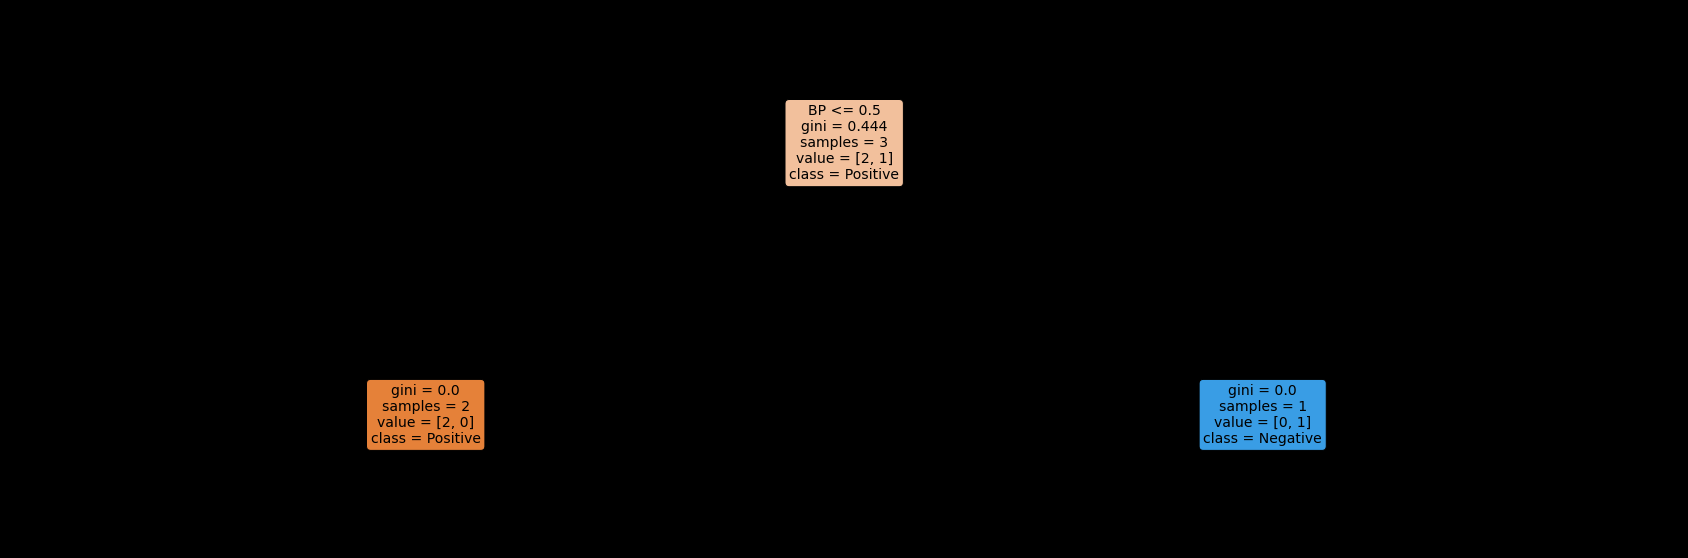

In [51]:
feature = ['Pulse', 'BP', 'Age']
X = df[feature]
y = df.Treat
labels = y.unique()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

**Comparision of built and validated model**
<br>
While comparing the tree of our model with the tree of validated model, we can see that in both scenarios BP is at the top of tree. This shows that the model we built is working fine and BP have highest gain which is the reason we can see it in the top of the tree.